In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('synthetic_data.tsv',sep='\t')

In [3]:
df.head()

,A,B,C,y
0,-1.0,-1.0,-1.0,-0.606520
1,-1.0,-1.0,-0.9,-0.813881
2,-1.0,-1.0,-0.8,-0.986353
3,-1.0,-1.0,-0.7,-1.127664
4,-1.0,-1.0,-0.6,-1.241228


In [4]:
X = df[['A','B','C']].values
Y = df['y'].values

In [5]:
Y.shape

(9261,)

In [6]:
test_fraction=0.20

In [7]:
random_state=42

In [8]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(X, Y, test_size=test_fraction, random_state=random_state)

In [9]:
labels_test.shape

(1853,)

In [10]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt


In [11]:
model = MLPRegressor(
    hidden_layer_sizes=(20, 20),  activation='tanh', solver='lbfgs', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=100000, shuffle=True,
    random_state=9, tol=0.000001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)



In [12]:

clf = model.fit(data_train, labels_train)

In [13]:
test_y = clf.predict(data_test)

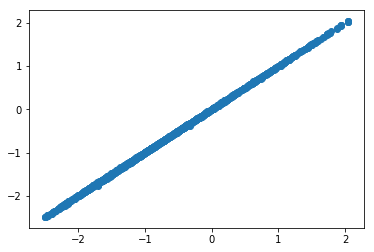

In [14]:
plt.scatter(labels_test,test_y,)

In [15]:
clf.score(data_test,labels_test)

0.9999184004864747

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import regularizers

Using TensorFlow backend.


#Sequential is fully-connected models.It is linear stack of layers

* Dense is one of core layers. There are other options such as Conv1D, Conv2D
* Available activation: softmax, elu,relu,selu, softplus,softsign,tanh,sigmoid,hard sigmoid,linear
* Available Initilizer(For weight): Zeros, Ones, COnstant,Arguments, RandomUniform,RandomNoemal,Truncated Normal. Variance Scaling, Orthogonol.Identity, lecun_uniform,glorot_normal,glorot_uniform,he_normal,lecun_normal,he_uiform
* Customer Initializer(backend):shape and dtype to be defined
* Developing new regularizers: Any Function takes a weight matrix and returns a loss contribution


In [82]:
num_layers = 5
num_neurons = [100,100,100,100,100,100,100,100,100,1]
n_x = 3
n_epochs = 150
batch_sizes = 10

In [107]:
model = keras.Sequential()
model.add(keras.layers.Dense(num_neurons[0],input_dim=n_x,activation='tanh',
                            use_bias=False,kernel_initializer='uniform',
                            kernel_regularizer=None,
                            activity_regularizer=None,kernel_constraint=None))
model.add(keras.layers.Dense(num_neurons[1],kernel_initializer='uniform',activation='tanh'))
model.add(keras.layers.Dense(num_neurons[2],kernel_initializer='uniform',activation='tanh'))
model.add(keras.layers.Dense(num_neurons[3],kernel_initializer='uniform',activation='tanh'))
model.add(keras.layers.Dense(num_neurons[4],kernel_initializer='uniform',activation='tanh'))
model.add(keras.layers.Dense(num_neurons[5],kernel_initializer='uniform',activation='tanh'))
model.add(keras.layers.Dense(num_neurons[6],kernel_initializer='uniform',activation='tanh'))
model.add(keras.layers.Dense(num_neurons[7],kernel_initializer='uniform',activation='tanh'))
model.add(keras.layers.Dense(num_neurons[8],kernel_initializer='uniform',activation='tanh'))
model.add(keras.layers.Dense(num_neurons[9],kernel_initializer='uniform',activation='tanh'))

In [108]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [72]:
X = np.array(data_train)
Y = np.array(labels_train)

In [109]:
model.fit(X,Y, epochs=n_epochs, batch_size=batch_sizes,verbose=0)

In [67]:
Test_x = np.array(data_test)
Test_y = np.array(labels_test)

In [112]:
scores = model.evaluate(X,Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7408/7408 [==============================] - 0s 59us/step

acc: 0.00%


In [110]:
predict = model.predict(Test_x)

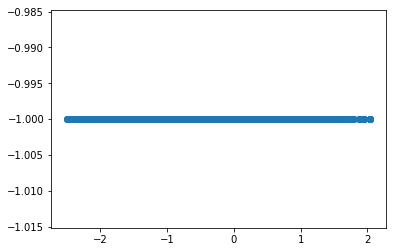

In [111]:
plt.scatter(Test_y,predict)